     Group  Converted
0  Control   0.096579
1     Test   0.166998
     Group  SessionDuration
0  Control       301.221509
1     Test       351.470974


<ipython-input-1-76861d86b5b0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rates, x='Group', y='Converted', palette='viridis')


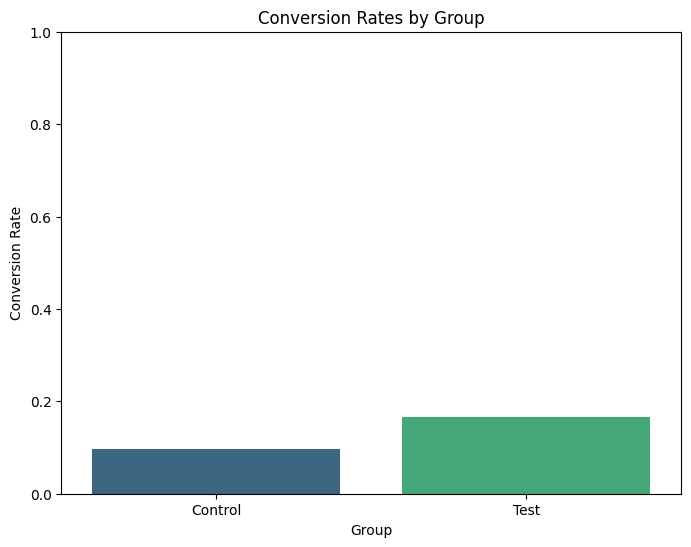

<ipython-input-1-76861d86b5b0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='SessionDuration', palette='viridis')


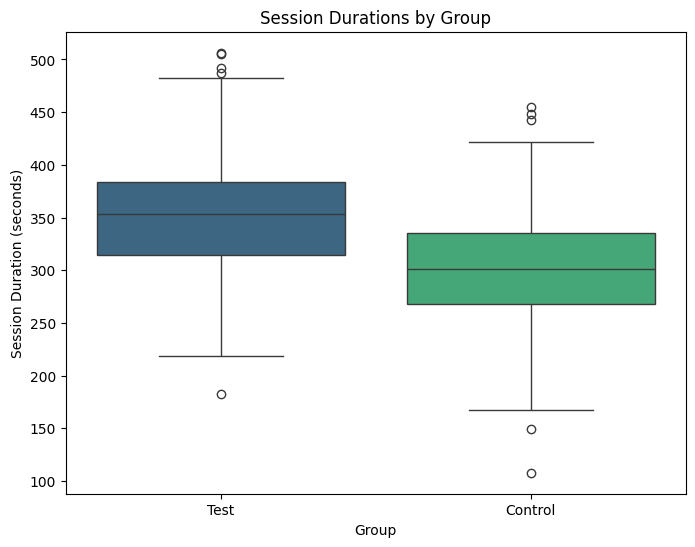

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/ab_testing_dataset.csv'
df = pd.read_csv(file_path)


conversion_rates = df.groupby('Group')['Converted'].mean().reset_index()
print(conversion_rates)


session_durations = df.groupby('Group')['SessionDuration'].mean().reset_index()
print(session_durations)


plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_rates, x='Group', y='Converted', palette='viridis')
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Group', y='SessionDuration', palette='viridis')
plt.title('Session Durations by Group')
plt.ylabel('Session Duration (seconds)')
plt.xlabel('Group')
plt.show()


In [2]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['Group'], df['Converted'])
print("Contingency Table:")
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")


if p < 0.05:
    print("The difference in conversion rates is statistically significant (P < 0.05).")
else:
    print("The difference in conversion rates is not statistically significant (P >= 0.05).")


Contingency Table:
Converted    0   1
Group             
Control    449  48
Test       419  84

Chi-Square Test Results:
Chi-Square Statistic: 10.2136
P-Value: 0.0014
The difference in conversion rates is statistically significant (P < 0.05).


In [3]:
from statsmodels.stats.proportion import proportions_ztest


successes = contingency_table.loc[:, 1]
n_obs = contingency_table.sum(axis=1)


z_stat, p_value = proportions_ztest(successes, n_obs)
print(f"\nProportions Z-Test Results:")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


if p_value < 0.05:
    print("The difference in conversion rates is statistically significant (P < 0.05).")
else:
    print("The difference in conversion rates is not statistically significant (P >= 0.05).")



Proportions Z-Test Results:
Z-Statistic: -3.2893
P-Value: 0.0010
The difference in conversion rates is statistically significant (P < 0.05).


In [4]:
from scipy.stats import ttest_ind


control_sessions = df[df['Group'] == 'Control']['SessionDuration']
test_sessions = df[df['Group'] == 'Test']['SessionDuration']


t_stat, p_val = ttest_ind(control_sessions, test_sessions, equal_var=False)  # Welch's T-Test
print(f"\nTwo-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")


if p_val < 0.05:
    print("The difference in session durations is statistically significant (P < 0.05).")
else:
    print("The difference in session durations is not statistically significant (P >= 0.05).")



Two-Sample T-Test Results:
T-Statistic: -15.3971
P-Value: 0.0000
The difference in session durations is statistically significant (P < 0.05).


<ipython-input-5-316709666b37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rates, x='Group', y='Converted', palette='viridis')


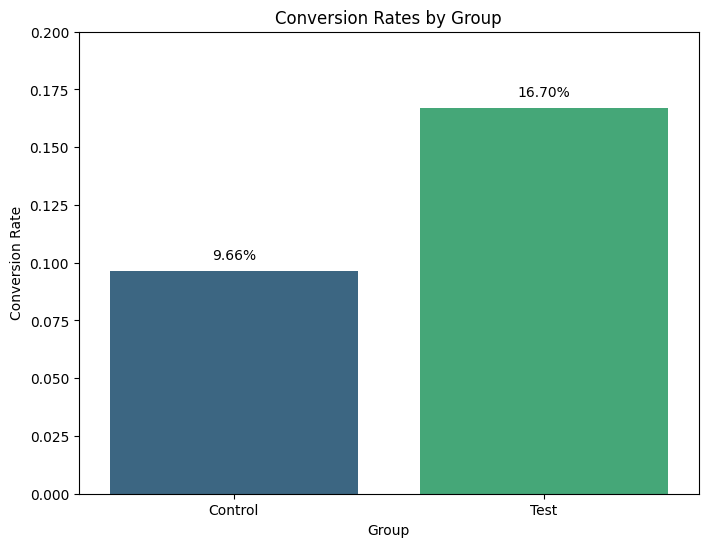

<ipython-input-5-316709666b37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='SessionDuration', palette='viridis')


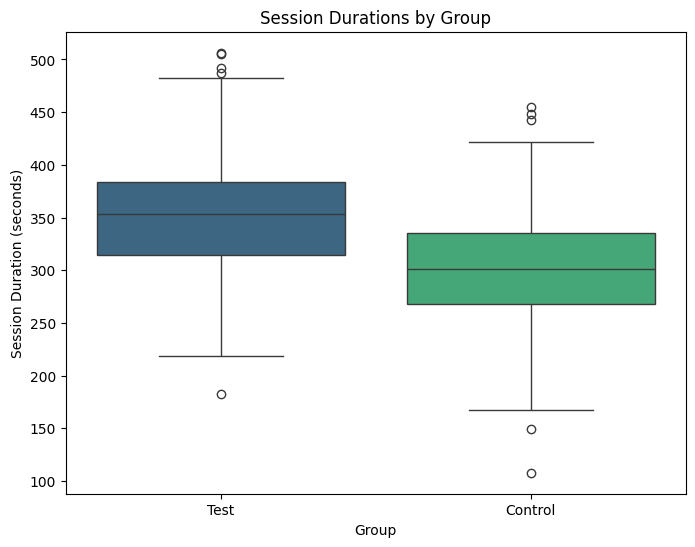

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

conversion_rates = df.groupby('Group')['Converted'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_rates, x='Group', y='Converted', palette='viridis')
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 0.2)
for i, value in enumerate(conversion_rates['Converted']):
    plt.text(i, value + 0.005, f"{value:.2%}", ha='center')
plt.savefig('conversion_rates_by_group.png')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Group', y='SessionDuration', palette='viridis')
plt.title('Session Durations by Group')
plt.ylabel('Session Duration (seconds)')
plt.xlabel('Group')
plt.savefig('session_durations_by_group.png')
plt.show()
